# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# <li> check for null vales

In [3]:
null_columns=df.columns[df.isnull().any()]


In [4]:
df[null_columns].isnull().sum()

Series([], dtype: float64)

# <li>  Is the distribution of body temperatures normal? 


In [5]:
#Lets plot the histogram to see if we get bell shaped curve for normaly distributed data.
#we can see that visually it looks as normally distributed

C:\Users\Sushama\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


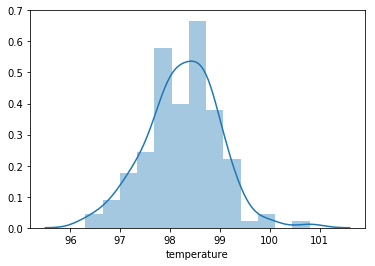

In [6]:
sns.distplot(df.temperature);


## Using shapiro

In [7]:
from scipy import stats

In [8]:
stats.shapiro(df.temperature)

(0.9865769743919373, 0.2331680953502655)

## using normaltest

In [9]:
scipy.stats.mstats.normaltest(df.temperature)


NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

# Since P value is greater than 0.05 the data is normaly distributed

# <li>  Is the sample size large? Are the observations independent?


In [19]:
df.shape
len(df)

130

 for independency our sample size shouldn't be more than 10%, percent of the population.As in our case it says 120 years of data so 
    compared to that much data ,it is 130 numbers so less than 10%

Sample size is large i.e 130 observations i.e.n>=30 as per Central Limit theorem

Observations are assumed to be indepndent as per condition of central limit theorem

<li>  Is the true population mean really 98.6 degrees F?


In [16]:
sample_mean = np.mean(df['temperature'])
sample_mean

98.24923076923078

# Bootstrap hypothesis testing

H0:Mean body temperature is 98.6

H1:Mean body temperature is different than 98.6

In [29]:
assumed_mean=98.6

In [30]:
sample_std_dev=np.std(df['temperature'])
sample_std_dev

0.7303577789050377

In [31]:
sample_error_for_sample = sample_std_dev/np.sqrt(len(df))

In [32]:
sample_error_for_sample

0.06405661469519336

In [33]:
0.064>0.05

True

In [40]:
t=(sample_mean-assumed_mean)/(0.7303/np.sqrt(130))

In [42]:
t=(sample_mean-assumed_mean)/(sample_std_dev/np.sqrt(len(df)))

In [43]:
t

-5.475925202078116

based on t statistics the p value is less than 0.00001 as per data entered at below website

https://www.socscistatistics.com/pvalues/tdistribution.aspx

so we can reject null hypothesis and conclude that mean  body temperature is different than 98.6 

## Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?


Here I would like to use one-sample test because I just need to determine if sample mean is statistically different from a known or hypothesized population mean

In [70]:
print (stats.ttest_1samp(df.temperature,98.6))


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


## In this situation, is it appropriate to use the t or z statistic? 


A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if we dont
know the population standard deviation as per our situation.

# Now try using the other test. How is the result be different? Why?


In [72]:
from statsmodels.stats.weightstats import ztest
#run z-test
print (ztest(df.temperature,value=98.6))

(-5.4548232923645195, 4.9021570141012155e-08)


Here we can conclude that for both the cases,t statistics and z statistics p values is very very less and so we can reject null hypotheis

# <li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 


In [73]:
np.random.seed(4)
smallsample=np.random.choice(df.temperature, size=10, replace=False, p=None)

#run z-test
print (ztest(smallsample,value=98.6))
#run t-tst
print (stats.ttest_1samp(smallsample,98.6))

(-1.1094736855098295, 0.2672258902416337)
Ttest_1sampResult(statistic=-1.1094736855098295, pvalue=0.2959897629162706)


# Which one is the correct one to use? 


Since we dont know the population's standard deviation so t test is appropriate to use

## What do you notice? What does this tell you about the difference in application of the t and z statistic?


For small samples both the T and z statistics value are close but less than 0.005 to reject  null hypothesis

# At what temperature should we consider someone's temperature to be "abnormal"?


In [79]:
t= stats.t.ppf(1-0.025, len(df.index)-1)
s= np.std(df.temperature)
n=len(df.index)-1

#margin of error = t * s/sqrt(n) 
me=t * s/np.sqrt(n) 

lower_limit=np.mean(df.temperature)-me
upper_limit=np.mean(df.temperature)+me

print('marginal error is {}'.format(me))
print(lower_limit)
print(upper_limit)


marginal error is 0.12722786362273047
98.12200290560804
98.37645863285351


# As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [80]:
#A 95% Confidence Interval will be used. 
# For 95% Confidence Interval, the critical value is: 1.96.

#margin of error (me) = 1.96 * Standard Error

#Standard Error (se) = standard deviation / (n)^0.5

#Reminder : standard deviation = 0.730357778905, n = 130

se = np.std(df.temperature) /np.sqrt(len(df.temperature))
me = 1.96*se
 

Confidence_interval = [np.mean(df.temperature)-me,np.mean(df.temperature)+me]
Confidence_interval

[98.12367980442819, 98.37478173403336]

# Is there a significant difference between males and females in normal temperature?


In [75]:
df.groupby(['gender']).agg({'temperature':('mean','std'),'gender': "count"})    

temperature           gender
              mean       std  count
gender                             
F        98.393846  0.743488     65
M        98.104615  0.698756     65

Female average body temperature is slightly higher than male average body temperature

# What testing approach did you use and why?


We can use two sample test as we have data for male and females 

In [76]:
dfm=df.loc[df.gender=='M']
dff=df.loc[df.gender=='F']

male_temp = dfm.temperature
female_temp = dff.temperature


In [78]:
stats.ttest_ind(dfm.temperature,dff.temperature)


Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

We can observe that p value is less than 0.05 so that we can reject null hypotheis and we can conclude that the means of temperature 
for male and female are not same.

# Write a story with your conclusion in the context of the original problem.


The population statement mentions the  98.6$^{\circ}$F for more than 120 years,however when we perform the hypothesis analysis on sample of data ,we found that the normal body temperature is different than 98.6$^{\circ}$F.Also we found that Female Average body temperature is more than Male which was not mentioned in population statement.